# EDA of video game sales and trends
-most sold
-distribution of region
-year count
- sales by region
- pipolarity
- most publisher
- most global year


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv(r"E:\General\video games sales.csv")

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df.shape

(16598, 11)

In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
most_sold = df.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)

In [7]:
most_sold

Name
Wii Sports                                      82.74
Grand Theft Auto V                              55.92
Super Mario Bros.                               45.31
Tetris                                          35.84
Mario Kart Wii                                  35.82
                                                ...  
Lucian Bee's: Resurrection Supernova             0.01
Style Book: Cinnamoroll                          0.01
Sora no Otoshimono: DokiDoki Summer Vacation     0.01
King's Bounty: Armored Princess                  0.01
ef - a fairy tale of the two.                    0.01
Name: Global_Sales, Length: 11493, dtype: float64

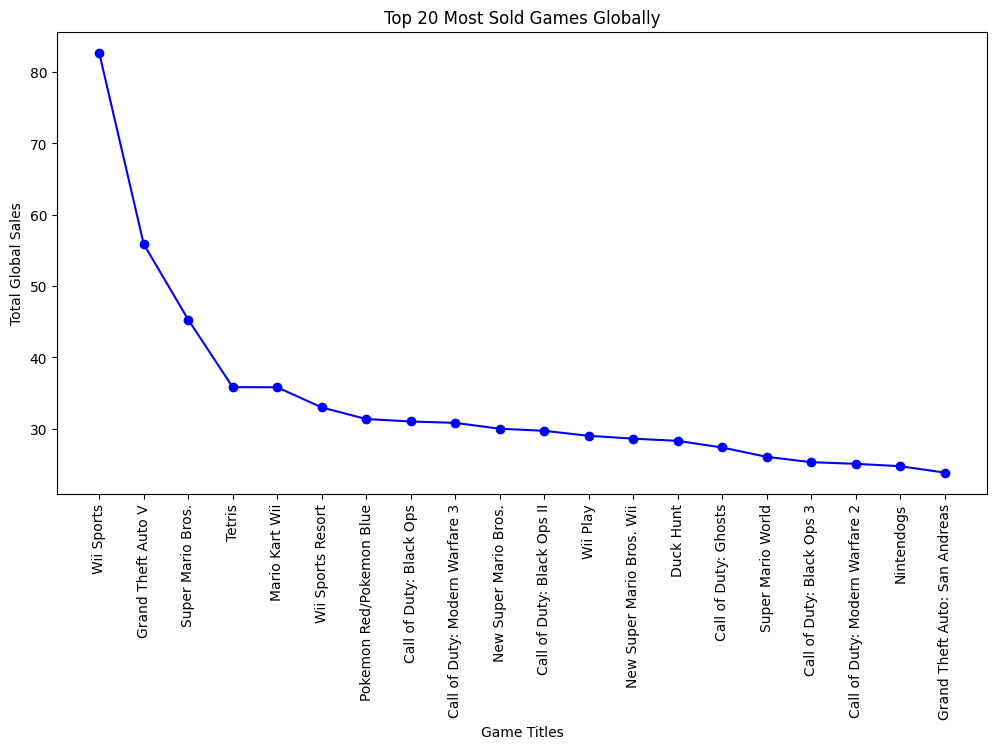

In [13]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

# Select only the top 20 most sold games
most_sold_top20 = most_sold.head(20)

plt.plot(most_sold_top20.index, most_sold_top20.values, marker="o", linestyle="-", color="blue")

# Adding labels
plt.xlabel("Game Titles")
plt.ylabel("Total Global Sales")
plt.title("Top 20 Most Sold Games Globally")
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability

# Display the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_12576\1232305426.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt["Region"], y=dt["Sales"], palette="viridis")


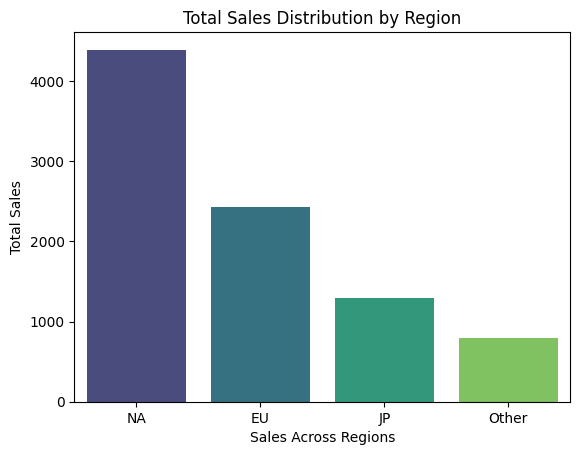

In [9]:
dt = pd.DataFrame({
    "Region": ["NA", "EU", "JP", "Other"],
    "Sales": [df["NA_Sales"].sum(), df["EU_Sales"].sum(), df["JP_Sales"].sum(), df["Other_Sales"].sum()]
})

# Sorting data for better visualization
dt = dt.sort_values(by="Sales", ascending=False)

# Creating the bar plot
sns.barplot(x=dt["Region"], y=dt["Sales"], palette="viridis")

# Labeling the axes
plt.xlabel("Sales Across Regions")
plt.ylabel("Total Sales")
plt.title("Total Sales Distribution by Region")

# Displaying the plot
plt.show()

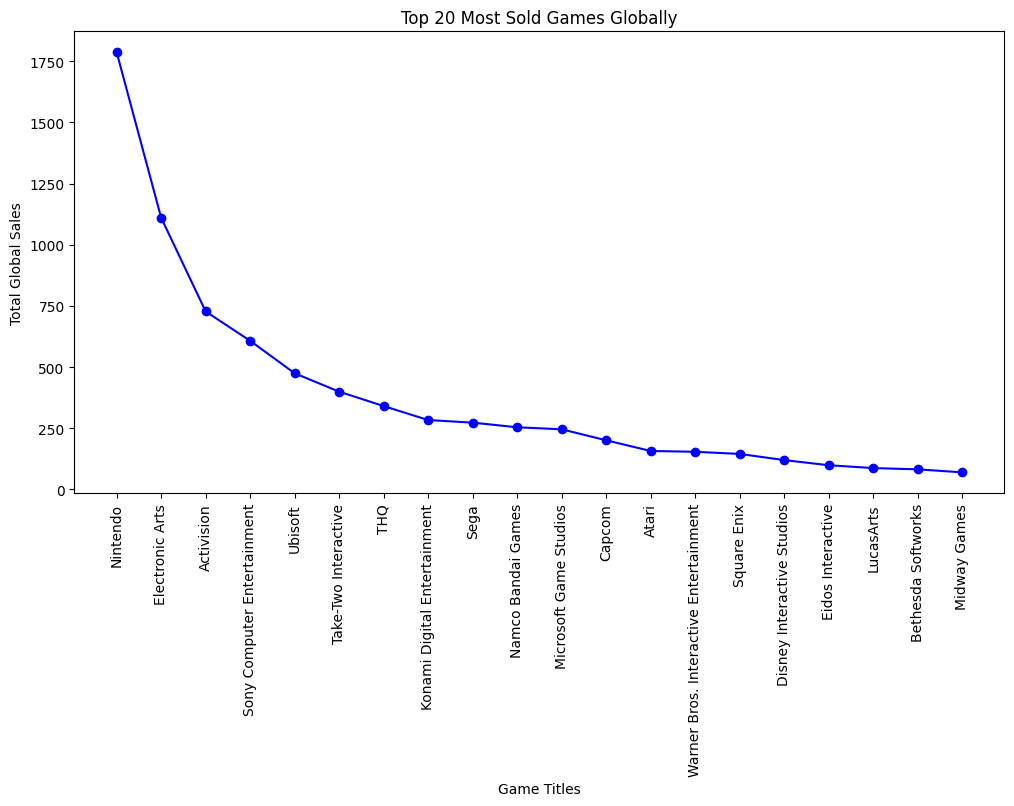

In [18]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
most_dom=df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)
# Select only the top 20 most sold games
most_dom_top20 = most_dom.head(20)

plt.plot(most_dom_top20.index, most_dom_top20.values, marker="o", linestyle="-", color="blue")

# Adding labels
plt.xlabel("Game Titles")
plt.ylabel("Total Global Sales")
plt.title("Top 20 Most Sold Games Globally")
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability

# Display the plot
plt.show()

<Axes: xlabel='Year', ylabel='Count'>

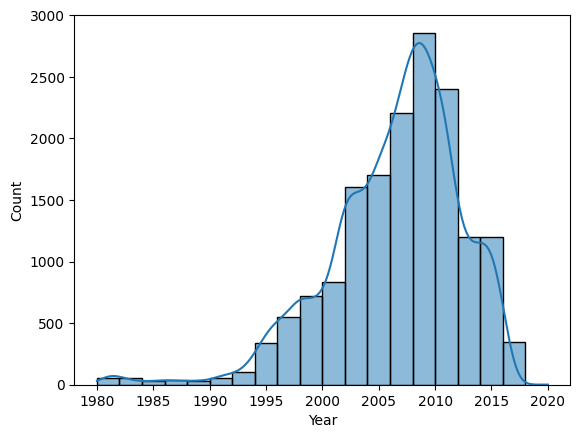

In [23]:
sns.histplot(data=df["Year"],bins=20,kde=True)

From chatGPT

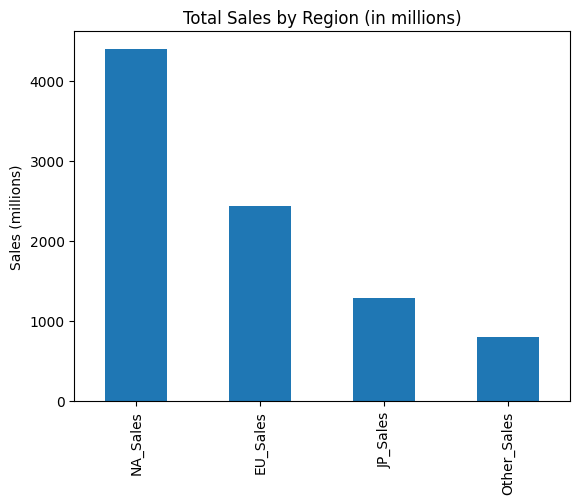

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
EU_Sales,NaN,29.02,NaN,NaN
JP_Sales,NaN,NaN,10.22,NaN
NA_Sales,41.49,NaN,NaN,NaN
Name,Wii Sports,Wii Sports,Pokemon Red/Pokemon Blue,Grand Theft Auto: San Andreas
Other_Sales,NaN,NaN,NaN,10.57


In [24]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales.plot(kind='bar', title='Total Sales by Region (in millions)')
plt.ylabel("Sales (millions)")
plt.show()

top_by_region = {
    region: df.loc[df[region].idxmax(), ['Name', region]]
    for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
}
pd.DataFrame(top_by_region)


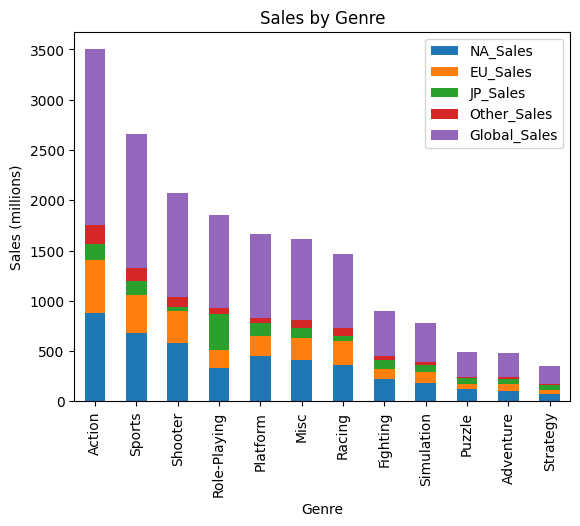

In [25]:
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
genre_sales.sort_values(by='Global_Sales', ascending=False).plot(kind='bar', stacked=True, title="Sales by Genre")
plt.ylabel("Sales (millions)")
plt.show()


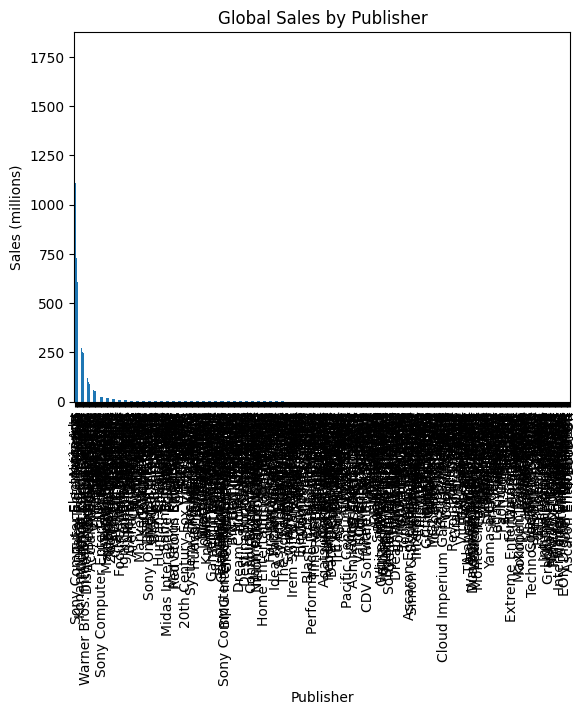

In [26]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
publisher_sales.plot(kind='bar', title='Global Sales by Publisher')
plt.ylabel("Sales (millions)")
plt.show()

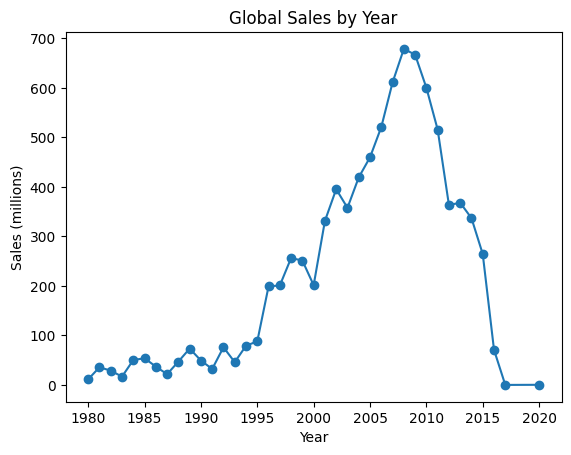

In [27]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
yearly_sales.plot(marker='o', title='Global Sales by Year')
plt.ylabel("Sales (millions)")
plt.show()


In [28]:
summary = f"""
Executive Summary:
------------------
- North America leads in game sales, with 113.44 million units total from top 5 games.
- Nintendo dominates all top-selling titles across genres and platforms.
- 'Sports' and 'Platform' are the most successful genres globally.
- Regional preferences vary: 'Super Mario Bros.' sold heavily in NA, while 'Pokemon' performed best in Japan.
- Sales peaked around 2006–2009, correlating with the Wii console's peak popularity.
"""
print(summary)



Executive Summary:
------------------
- North America leads in game sales, with 113.44 million units total from top 5 games.
- Nintendo dominates all top-selling titles across genres and platforms.
- 'Sports' and 'Platform' are the most successful genres globally.
- Regional preferences vary: 'Super Mario Bros.' sold heavily in NA, while 'Pokemon' performed best in Japan.
- Sales peaked around 2006–2009, correlating with the Wii console's peak popularity.

